# Regresi Tunggal Linear

0.2861603375527428
1.7645569620253148


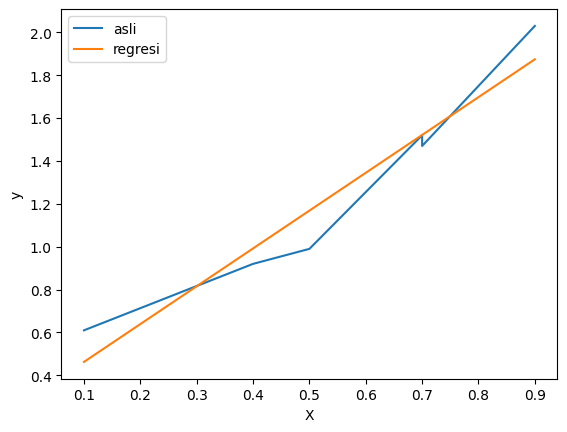

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tunggalLinear(x,y):
    x2 = []
    xy = []
    n = len(x)

    for i in range(n):
        hasil_x2 = (x[i])**2
        hasil_xy = (x[i])*(y[i])
        x2.append(hasil_x2)
        xy.append(hasil_xy)

    q = np.array([[n, sum(x)],
                [sum(x), sum(x2)]])

    p = np.array([[sum(y)],
                  [sum(xy)]])

    v = np.matmul(np.linalg.inv(q), p)

    a = v[0,0]
    b = v[1,0]

    return a,b

def y_pi(x,y,a,b):
    fx = []
    n = len(x)

    for i in range(n):
        hasil_fx =  a + (b*(x[i]))
        fx.append(hasil_fx)
    return fx

x = [0.1,0.4,0.5,0.7,0.7,0.9]
y = [0.61,0.92,0.99,1.52,1.47,2.03]
plt.plot(x,y, label = "asli")
a,b = tunggalLinear(x,y)

print(a)
print(b)

y = y_pi(x,y,a,b)
plt.plot(x,y, label = "regresi")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

0.5871161958328006
0.05909178064678219
1.729547488175908


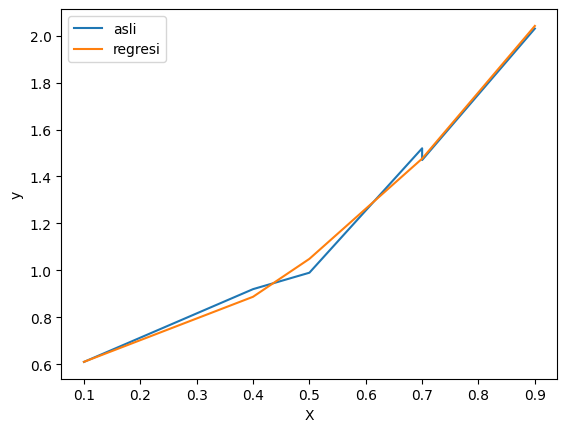

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tunggalnonLinear(x,y):
    x2 = []
    x3 = []
    x4 = []
    xy = []
    x2y = []
    n = len(x)

    for i in range(n):
        hasil_x2 = (x[i])**2
        hasil_x3 = (x[i])**3
        hasil_x4 = (x[i])**4

        x2.append(hasil_x2)
        x3.append(hasil_x3)
        x4.append(hasil_x4)

        hasil_xy = (x[i])*(y[i])
        hasil_x2y = (x2[i]) * (y[i])

        xy.append(hasil_xy)
        x2y.append(hasil_x2y)

    q = np.array([[n, sum(x),sum(x2)],
                [sum(x), sum(x2), sum(x3)],
                [sum(x2),sum(x3),sum(x4)]])

    p = np.array([[sum(y)],
                  [sum(xy)],
                  [sum(x2y)]])

    v = np.matmul(np.linalg.inv(q), p)

    a = v[0,0]
    b = v[1,0]
    c = v[2,0]

    return a,b,c

def y_pi(x,y,a,b,c):
    fx = []
    n = len(x)

    for i in range(n):
        hasil_fx =  a + (b*(x[i])) + (c*(x[i]**2))
        fx.append(hasil_fx)
    return fx

x = [0.1,0.4,0.5,0.7,0.7,0.9]
y = [0.61,0.92,0.99,1.52,1.47,2.03]
plt.plot(x,y, label = "asli")
a,b,c = tunggalnonLinear(x,y)

print(a)
print(b)
print(c)

y = y_pi(x,y,a,b,c)

plt.plot(x,y, label = "regresi")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

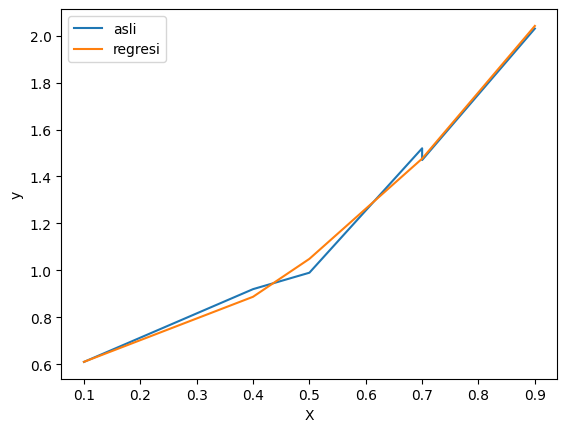

In [17]:

import numpy as np
import matplotlib.pyplot as plt
def construct(x, y, m):
    """
    Konstruksi matriks persamaan normal dan vektor hasil untuk regresi polinomial.

    Parameters:
    x (array-like): Data input (variabel independen).
    y (array-like): Data output (variabel dependen).
    m (int): Derajat polinomial (matriks akan berukuran (m+1) x (m+1)).

    Returns:
    tuple: (matriks_koefisien, vektor_hasil)
    """
    x = np.asarray(x)
    y = np.asarray(y)
    size = m + 1

    # Inisialisasi matriks
    XTX = np.zeros((size, size))

    # Mengisi matriks
    for i in range(size):
        for j in range(size):
            exponent = i + j
            XTX[i, j] = np.sum(x ** exponent)

    # Inisialisasi vektor
    XTY = np.zeros(size)

    # Mengisi vektor
    for i in range(size):
        exponent = i
        XTY[i] = np.sum(y * (x ** exponent))

    XTX_inv = np.linalg.inv(XTX)
    v = XTX_inv @ XTY

    a = v[0]
    b = v[1]
    c = v[2]

    return a,b,c

def y_pi(x,y,a,b,c):
    fx = []
    n = len(x)

    for i in range(n):
        hasil_fx =  a + (b*(x[i])) + (c*(x[i]**2))
        fx.append(hasil_fx)
    return fx

x = [0.1,0.4,0.5,0.7,0.7,0.9]
y = [0.61,0.92,0.99,1.52,1.47,2.03]
plt.plot(x,y, label = "asli")
m = 2
a,b,c = construct(x, y, m)

y = y_pi(x,y,a,b,c)
plt.plot(x,y, label = "regresi")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()